In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# import warnings
# # Suppressing a warning
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

import re
import time
import random
import tempfile
from tqdm.notebook import tqdm

import gc
gc.collect()

117

In [ ]:
! gdown --id 1oBDv1qMmEspgC14zMN_p7c_G9O0hSOzU

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1oBDv1qMmEspgC14zMN_p7c_G9O0hSOzU
To: /content/train.csv
100% 30.2M/30.2M [00:00<00:00, 227MB/s]


In [ ]:
! gdown --id 1PLBGgw9BNvQ3klz-Zc-LCI1UXkpKoU1d

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1PLBGgw9BNvQ3klz-Zc-LCI1UXkpKoU1d
To: /content/test.csv
100% 14.8M/14.8M [00:00<00:00, 169MB/s]


## Reading the Data from File

In [ ]:
df_origin_train = pd.read_csv('/content/train.csv')
df_train = df_origin_train.copy()
df_train

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [ ]:
df_origin_test = pd.read_csv('/content/test.csv')
df_test = df_origin_test.copy()
df_test

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,5642,3392,9,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,35.030402,273.0,No,49.574949,21.465380,Low_spent_Small_value_payments,186.266702
1,5643,3392,10,Aaron Maashoh,24.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,33.053114,274.0,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004
2,5644,3392,11,Aaron Maashoh,24.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,33.811894,275.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,264.675446
3,5645,3392,12,Aaron Maashoh,24.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,32.430559,276.0,No,49.574949,21.465380,High_spent_Medium_value_payments,343.826873
4,5654,8625,9,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,...,5.0,Good,605.03,25.926822,327.0,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,155621,34304,12,Sarah McBridec,28.0,31350942.0,Architect,20002.88,1929.906667,10.0,...,12.0,Bad,3571.70,34.780553,78.0,Yes,60.964772,34.662906,Low_spent_Small_value_payments,275.539570
49996,155630,37932,9,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,7.0,Good,502.38,27.758522,383.0,NM,35.104023,24.028477,Low_spent_Small_value_payments,409.394562
49997,155631,37932,10,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,7.0,Good,502.38,36.858542,384.0,No,35.104023,24.028477,Low_spent_Large_value_payments,349.726332
49998,155632,37932,11,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,7.0,Good,502.38,39.139840,385.0,No,35.104023,24.028477,High_spent_Small_value_payments,463.238981


In [ ]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Occupation_Num', 'Credit_Mix_Num',
       'Payment_of_Min_Amount_Num', 'Payment_Behaviour_Num'],
      dtype='object')

Recognizing and Understanding Data


In [ ]:
df_train.shape, df_test.shape

((100000, 28), (50000, 27))

In [ ]:
display(
    df_train.info(),
    print(),
    df_test.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

None

None

None

statistical values

In [ ]:
display(
    df_train.describe().T,
    print(),
    df_test.describe().T
)

,count,mean,std,min,25%,50%,75%,max
ID,100000.0,8.063150e+04,4.330149e+04,5634.000000,4.313275e+04,8.063150e+04,1.181302e+05,1.556290e+05
Customer_ID,100000.0,2.598267e+04,1.434054e+04,1006.000000,1.366450e+04,2.577700e+04,3.838500e+04,5.099900e+04
Month,100000.0,4.500000e+00,2.291299e+00,1.000000,2.750000e+00,4.500000e+00,6.250000e+00,8.000000e+00
Age,100000.0,3.331634e+01,1.076481e+01,14.000000,2.400000e+01,3.300000e+01,4.200000e+01,5.600000e+01
SSN,100000.0,5.004617e+08,2.908267e+08,81349.000000,2.451686e+08,5.006886e+08,7.560027e+08,9.999934e+08
Annual_Income,100000.0,5.050512e+04,3.829942e+04,7005.930000,1.934297e+04,3.699971e+04,7.168347e+04,1.799873e+05
Monthly_Inhand_Salary,100000.0,4.197271e+03,3.186432e+03,303.645417,1.626594e+03,3.095905e+03,5.957715e+03,1.520463e+04
Num_Bank_Accounts,100000.0,5.368820e+00,2.593314e+00,0.000000,3.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Num_Credit_Card,100000.0,5.533570e+00,2.067098e+00,0.000000,4.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Interest_Rate,100000.0,1.453208e+01,8.741330e+00,1.000000,7.000000e+00,1.300000e+01,2.000000e+01,3.400000e+01


None

,count,mean,std,min,25%,50%,75%,max
ID,50000.0,8.063750e+04,4.330170e+04,5642.000000,4.313975e+04,8.063750e+04,1.181352e+05,1.556330e+05
Customer_ID,50000.0,2.598267e+04,1.434061e+04,1006.000000,1.366450e+04,2.577700e+04,3.838500e+04,5.099900e+04
Month,50000.0,1.050000e+01,1.118045e+00,9.000000,9.750000e+00,1.050000e+01,1.125000e+01,1.200000e+01
Age,50000.0,3.380450e+01,1.076458e+01,14.000000,2.500000e+01,3.300000e+01,4.200000e+01,5.600000e+01
SSN,50000.0,5.004617e+08,2.908282e+08,81349.000000,2.451686e+08,5.006886e+08,7.560027e+08,9.999934e+08
Annual_Income,50000.0,5.050512e+04,3.829961e+04,7005.930000,1.934297e+04,3.699971e+04,7.168347e+04,1.799873e+05
Monthly_Inhand_Salary,50000.0,4.183034e+03,3.175319e+03,303.645417,1.623555e+03,3.082272e+03,5.937530e+03,1.520463e+04
Num_Bank_Accounts,50000.0,5.369220e+00,2.594886e+00,0.000000,3.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Num_Credit_Card,50000.0,5.533840e+00,2.071835e+00,0.000000,4.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
Interest_Rate,50000.0,1.453208e+01,8.741374e+00,1.000000,7.000000e+00,1.300000e+01,2.000000e+01,3.400000e+01


In [ ]:
display(
    df_train.describe(exclude=np.number).T,
    print(),
    df_test.describe(exclude=np.number).T
)

,count,unique,top,freq
Name,100000,10128,Jessicad,48
Occupation,100000,15,Lawyer,7096
Type_of_Loan,100000,6261,No Data,11408
Credit_Mix,100000,3,Standard,45848
Payment_of_Min_Amount,100000,3,Yes,52326
Payment_Behaviour,100000,6,Low_spent_Small_value_payments,28585
Credit_Score,100000,3,Standard,53174


None

,count,unique,top,freq
Name,50000,10128,Jessicad,24
Occupation,50000,15,Lawyer,3548
Type_of_Loan,50000,6261,No Data,5704
Credit_Mix,50000,3,Standard,22924
Payment_of_Min_Amount,50000,3,Yes,26158
Payment_Behaviour,50000,6,Low_spent_Small_value_payments,14147


check the missing values

In [ ]:
df_train['Credit_Score'].isna().sum()

0

Concat Train-Test Data

In [ ]:
(df_train.columns[:-1]!=df_test.columns).sum()

0

In [ ]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.shape

(150000, 28)

In [ ]:
df['Credit_Score'].isna().sum()

50000

In [ ]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                50000
dtype: int64

In [ ]:
df.isnull().mean()*100

ID                           0.000000
Customer_ID                  0.000000
Month                        0.000000
Name                         0.000000
Age                          0.000000
SSN                          0.000000
Occupation                   0.000000
Annual_Income                0.000000
Monthly_Inhand_Salary        0.000000
Num_Bank_Accounts            0.000000
Num_Credit_Card              0.000000
Interest_Rate                0.000000
Num_of_Loan                  0.000000
Type_of_Loan                 0.000000
Delay_from_due_date          0.000000
Num_of_Delayed_Payment       0.000000
Changed_Credit_Limit         0.000000
Num_Credit_Inquiries         0.000000
Credit_Mix                   0.000000
Outstanding_Debt             0.000000
Credit_Utilization_Ratio     0.000000
Credit_History_Age           0.000000
Payment_of_Min_Amount        0.000000
Total_EMI_per_month          0.000000
Amount_invested_monthly      0.000000
Payment_Behaviour            0.000000
Monthly_Bala

## If needed, rename the columns' names for easy use.

In [ ]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

# B. Examining the Data

In [ ]:
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Name                   150000 non-null  object
 1   Occupation             150000 non-null  object
 2   Type_of_Loan           150000 non-null  object
 3   Credit_Mix             150000 non-null  object
 4   Payment_of_Min_Amount  150000 non-null  object
 5   Payment_Behaviour      150000 non-null  object
 6   Credit_Score           100000 non-null  object
dtypes: object(7)
memory usage: 8.0+ MB


## Detect NaN Values

In [ ]:
object_col = df.describe(include='O').columns
object_col

Index(['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'],
      dtype='object')

In [ ]:
for col in object_col:
    print('Column Name: '+col)
    print("**"*20)
    print(df_train[col].value_counts(dropna=False))
    print('END', "--"*18, '\n')

Column Name: Name
****************************************
Name
Jessicad              48
Langep                48
Stevex                48
Vaughanl              40
Ronald Groverk        40
                      ..
Breidthardtj           8
Sven Egenterx          8
Antonella Ciancioc     8
Valentina Zan          8
Nicks                  8
Name: count, Length: 10128, dtype: int64
END ------------------------------------ 

Column Name: Occupation
****************************************
Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64
END ------------------------------------ 

Column Name: Type_of_Loan
****************************************
Type_of_Loan
No Data               

In [ ]:
df_copy1 = df.copy()
df_copy1.shape

(150000, 28)

## Clear NaN Values

> Add blockquote



In [ ]:
def text_cleaning(data):
    if data is np.NaN or not isinstance(data, str):
        return data
    else:
        return str(data).strip('_ ,"')

In [ ]:
df = df_copy1.applymap(text_cleaning).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,155621,34304,12,Sarah McBridec,28.0,31350942.0,Architect,20002.88,1929.906667,10.0,...,Bad,3571.70,34.780553,78.0,Yes,60.964772,34.662906,Low_spent_Small_value_payments,275.539570,NaN
149996,155630,37932,9,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,27.758522,383.0,NM,35.104023,24.028477,Low_spent_Small_value_payments,409.394562,NaN
149997,155631,37932,10,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,36.858542,384.0,No,35.104023,24.028477,Low_spent_Large_value_payments,349.726332,NaN
149998,155632,37932,11,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,39.139840,385.0,No,35.104023,24.028477,High_spent_Small_value_payments,463.238981,NaN


In [ ]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                            0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                50000
dtype: int64

# Fixing a data type (value_counts(), astype(), infer_objects(), convert_dtypes())

- Detect strange values by Columns Convert Object Types to Numeric Types (int, float, np.int64, pd.Int64Dtype())
- Combining object columns

Change column type in pandas:

  01. astype() - convert (almost) any type to (almost) any other type (even if it's not necessarily sensible to do so). Also   allows you to convert to categorial types (very useful).
  02. infer_objects() - a utility method to convert object columns holding Python objects to a pandas type if possible.
  03. convert_dtypes() - convert DataFrame columns to the "best possible" dtype that supports pd.NA (pandas' object to indicate a missing value).
  04. to_numeric() - provides functionality to safely convert non-numeric types.(See also to_datetime() and to_timedelta().)
  05. factorize() - provides sorting

In [ ]:
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Name                   150000 non-null  object
 1   Occupation             150000 non-null  object
 2   Type_of_Loan           150000 non-null  object
 3   Credit_Mix             150000 non-null  object
 4   Payment_of_Min_Amount  150000 non-null  object
 5   Payment_Behaviour      150000 non-null  object
 6   Credit_Score           100000 non-null  object
dtypes: object(7)
memory usage: 8.0+ MB


In [ ]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame

# Convert ID column to hexadecimal
df['ID'] = df.ID.apply(lambda x: hex(x))

df['Month'] = df['Month'].astype(int)
# Convert Age column to integers
df['Age'] = df.Age.astype(int)

# Remove hyphens from SSN and convert to float
df['SSN'] = df.SSN.apply(lambda x: np.nan if pd.isnull(x) else float(str(x).replace('-', '')))

# Ensure other float conversions are correct
df['Annual_Income'] = df.Annual_Income.astype(float)
df['Num_of_Loan'] = df.Num_of_Loan.astype(int)
df['Num_of_Delayed_Payment'] = df.Num_of_Delayed_Payment.astype(float)
df['Changed_Credit_Limit'] = df.Changed_Credit_Limit.astype(float)
df['Outstanding_Debt'] = df.Outstanding_Debt.astype(float)
df['Amount_invested_monthly'] = df.Amount_invested_monthly.astype(float)
df['Monthly_Balance'] = df.Monthly_Balance.astype(float)


### Assign Categorical Types to Numeric Types
- Maybe Use Before Machine Learning or Use OrdinalEncoder, LabelEncoder etc.

In [ ]:
df['Occupation_Num'] = df.Occupation.astype('category').cat.codes
df['Credit_Mix_Num'] = df.Credit_Mix.astype('category').cat.codes
df['Payment_of_Min_Amount_Num'] = df.Payment_of_Min_Amount.astype('category').cat.codes
df['Payment_Behaviour_Num'] = df.Payment_Behaviour.astype('category').cat.codes

#### Credit_History_Age

In [ ]:
def Month_Converter(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])

        return (num1*12)+num2
    else:
        return x

# Month_Converter('3 Years and 1 Months')

In [ ]:
def Month_Converter(x):
    if pd.notnull(x) and isinstance(x, str):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])
        return num1 * 12 + num2
    else:
        return x

df['Credit_History_Age'] = df.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(float)


In [ ]:
df.groupby('Customer_ID')['Credit_History_Age'].apply(list)

Customer_ID
1006     [182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188...
1007     [346.0, 347.0, 348.0, 349.0, 350.0, 351.0, 352...
1008     [292.0, 293.0, 294.0, 295.0, 296.0, 297.0, 298...
1009     [331.0, 332.0, 333.0, 334.0, 335.0, 336.0, 337...
1011     [179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185...
                               ...                        
50984    [157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163...
50990    [70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77....
50992    [159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165...
50996    [206.0, 207.0, 208.0, 209.0, 210.0, 211.0, 212...
50999    [226.0, 227.0, 228.0, 229.0, 230.0, 231.0, 232...
Name: Credit_History_Age, Length: 12500, dtype: object

In [ ]:
df['Type_of_Loan'].value_counts(dropna=False).head(20)

Type_of_Loan
No Data                                17112
not specified                           2112
credit-builder loan                     1920
personal loan                           1908
debt consolidation loan                 1896
student loan                            1860
payday loan                             1800
mortgage loan                           1764
auto loan                               1728
home equity loan                        1704
personal loan,student loan               480
not specified,payday loan                408
mortgage loan,home equity loan           396
student loan,payday loan                 384
student loan,credit-builder loan         372
credit-builder loan,not specified        372
payday loan,debt consolidation loan      360
payday loan,auto loan                    360
mortgage loan,not specified              348
payday loan,personal loan                348
Name: count, dtype: int64

In [ ]:
df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: x.lower().replace('and ', '').replace(', ', ',').strip() if pd.notna(x) else x)

In [ ]:
df.groupby('Customer_ID')['Type_of_Loan'].value_counts(dropna=False)

Customer_ID  Type_of_Loan                                                                                
1006         credit-builder loan,payday loan                                                                 12
1007         home equity loan,mortgage loan,student loan                                                     12
1008         no data                                                                                         12
1009         credit-builder loan,student loan,not specified,student loan                                     12
1011         personal loan,auto loan,auto loan                                                               12
                                                                                                             ..
50984        home equity loan,mortgage loan,payday loan,mortgage loan,mortgage loan,payday loan              12
50990        mortgage loan,auto loan,auto loan                                                               1

In [ ]:
df.groupby('Customer_ID')['Type_of_Loan'].apply(list)

Customer_ID
1006     [credit-builder loan,payday loan, credit-build...
1007     [home equity loan,mortgage loan,student loan, ...
1008     [no data, no data, no data, no data, no data, ...
1009     [credit-builder loan,student loan,not specifie...
1011     [personal loan,auto loan,auto loan, personal l...
                               ...                        
50984    [home equity loan,mortgage loan,payday loan,mo...
50990    [mortgage loan,auto loan,auto loan, mortgage l...
50992    [student loan,credit-builder loan,mortgage loa...
50996    [no data, no data, no data, no data, no data, ...
50999    [credit-builder loan, credit-builder loan, cre...
Name: Type_of_Loan, Length: 12500, dtype: object

In [ ]:
def get_Diff_Values_Colum(df_column, diff_value=[], sep=',', replace=''):
    column = df_column.dropna()
    for i in column:
        if sep not in i and i not in diff_value:
            diff_value.append(i)
        else:
            for data in map(lambda x:x.strip(), re.sub(replace, '', i).split(sep)):
                if not data in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value)))

In [ ]:
get_Diff_Values_Colum(df['Type_of_Loan'])

{0: 'auto loan',
 1: 'credit-builder loan',
 2: 'debt consolidation loan',
 3: 'home equity loan',
 4: 'mortgage loan',
 5: 'no data',
 6: 'not specified',
 7: 'payday loan',
 8: 'personal loan',
 9: 'student loan'}

# 02. Exploratory Data Analysis (EDA)

# A. Object Column NaN Values: Reassign Group Mode Values

In [ ]:
def Object_NaN_Values_Reassign_Group_Mode(df, groupby, column, inplace=True):
    # Assigning Wrong values Make Simple Function
    def make_NaN_and_fill_mode(df, groupby, column, inplace=True):
        # Assign None to np.NaN
        if df[column].isin([None]).sum():
            df[column][df[column].isin([None])] = np.NaN

        # fill with local mode
        result = df.groupby(groupby)[column].transform(lambda x: x.fillna(x.mode()[0]))

        # inplace
        if inplace:
            df[column] = result
        else:
            return result

    # Run
    if inplace:
        # Before Assigning NaN values
        if df[column].isna().sum() > 0:
            print(f'\nBefore Assigning: {column}:', f'have {df[column].isna().sum()} NaN Values', end='\n')

        a = df.groupby(groupby)[column].apply(list)
        print(f'\nBefore Assigning Example {column}:\n', *a.head().values, sep='\n', end='\n')

        # Assigning
        make_NaN_and_fill_mode(df, groupby, column, inplace)

        # After Assigning NaN values
        if df[column].isna().sum() > 0:
            print(f'\nAfter Assigning: {column}:', f'have {df[column].isna().sum()} NaN Values', end='\n')

        b = df.groupby(groupby)[column].apply(list)
        print(f'\nAfter Assigning Example {column}:\n', *b.head().values, sep='\n', end='\n')
    else:
        # Show
        return make_NaN_and_fill_mode(df, groupby, column, inplace)

In [ ]:
df_copy2 = df.copy()
df_copy2.shape

(150000, 32)

In [ ]:
df = df_copy2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         150000 non-null  object 
 1   Customer_ID                150000 non-null  int64  
 2   Month                      150000 non-null  int64  
 3   Name                       150000 non-null  object 
 4   Age                        150000 non-null  int64  
 5   SSN                        150000 non-null  float64
 6   Occupation                 150000 non-null  object 
 7   Annual_Income              150000 non-null  float64
 8   Monthly_Inhand_Salary      150000 non-null  float64
 9   Num_Bank_Accounts          150000 non-null  float64
 10  Num_Credit_Card            150000 non-null  float64
 11  Interest_Rate              150000 non-null  float64
 12  Num_of_Loan                150000 non-null  int64  
 13  Type_of_Loan               15

### Name

In [ ]:
df['Name'].value_counts(dropna=False).head()

Name
Jessicad          72
Langep            72
Stevex            72
Vaughanl          60
Ronald Groverk    60
Name: count, dtype: int64

In [ ]:
mode_value = df['Name'].mode()[0]
df['Name'].fillna(mode_value, inplace=True)


In [ ]:
df.isnull().sum()

ID                               0
Customer_ID                      0
Month                            0
Name                             0
Age                              0
SSN                              0
Occupation                       0
Annual_Income                    0
Monthly_Inhand_Salary            0
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Num_of_Loan                      0
Type_of_Loan                     0
Delay_from_due_date              0
Num_of_Delayed_Payment           0
Changed_Credit_Limit             0
Num_Credit_Inquiries             0
Credit_Mix                       0
Outstanding_Debt                 0
Credit_Utilization_Ratio         0
Credit_History_Age               0
Payment_of_Min_Amount            0
Total_EMI_per_month              0
Amount_invested_monthly          0
Payment_Behaviour                0
Monthly_Balance                  0
Credit_Score                 50000
Occupation_Num      

In [ ]:
Object_NaN_Values_Reassign_Group_Mode(df, 'Customer_ID', 'Name')


Before Assigning Example Name:

['Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb']
['Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu', 'Soyoung Kimu']
['Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht', 'Koht']
['Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd', 'Edd']
['Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu', 'Terry Wadeu']

After Assigning Example Name:

['Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb', 'Matthias Blamontb',

### Occupation

In [ ]:
df['Occupation'].value_counts(dropna=False)

Occupation
Lawyer           10644
Engineer         10296
Architect        10236
Mechanic         10164
Scientist        10116
Accountant       10116
Developer        10080
Media_Manager    10080
Teacher          10008
Entrepreneur      9972
Doctor            9852
Journalist        9804
Manager           9648
Musician          9528
Writer            9456
Name: count, dtype: int64

In [ ]:
Object_NaN_Values_Reassign_Group_Mode(df, 'Customer_ID', 'Occupation')


Before Assigning Example Occupation:

['Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist']
['Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager']
['Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer']
['Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant']
['Writer', 'Writer', 'Writer', 'Writer', 'Writer', 'Writer', 'Writer', 'Writer', 'Writer', 'Writer', 'Writer', 'Writer']

After Assigning Example Occupation:

['Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist']
['Man

### Type_of_Loan

In [ ]:
df.groupby('Customer_ID')['Type_of_Loan'].value_counts(dropna=False)

Customer_ID  Type_of_Loan                                                                                
1006         credit-builder loan,payday loan                                                                 12
1007         home equity loan,mortgage loan,student loan                                                     12
1008         no data                                                                                         12
1009         credit-builder loan,student loan,not specified,student loan                                     12
1011         personal loan,auto loan,auto loan                                                               12
                                                                                                             ..
50984        home equity loan,mortgage loan,payday loan,mortgage loan,mortgage loan,payday loan              12
50990        mortgage loan,auto loan,auto loan                                                               1

In [ ]:
df['Type_of_Loan'].replace([np.NaN], 'No Data', inplace=True)

### Credit_Mix

In [ ]:
df['Credit_Mix'].value_counts(dropna=False)

Credit_Mix
Standard    68772
Good        45576
Bad         35652
Name: count, dtype: int64

In [ ]:
Object_NaN_Values_Reassign_Group_Mode(df, 'Customer_ID', 'Credit_Mix')


Before Assigning Example Credit_Mix:

['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']

After Assigning Example Credit_Mix:

['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', 'Standard', 'Standard', 'Standard', 'Sta

### Payment_of_Min_Amount

In [ ]:
# Not Required
df['Payment_of_Min_Amount'].value_counts(dropna=False)

Payment_of_Min_Amount
Yes    78484
No     53516
NM     18000
Name: count, dtype: int64

### Payment_Behaviour

In [ ]:
df['Payment_Behaviour'].value_counts(dropna=False)

Payment_Behaviour
Low_spent_Small_value_payments      42732
High_spent_Medium_value_payments    28473
High_spent_Large_value_payments     22190
Low_spent_Medium_value_payments     21831
High_spent_Small_value_payments     18163
Low_spent_Large_value_payments      16611
Name: count, dtype: int64

In [ ]:
Object_NaN_Values_Reassign_Group_Mode(df, 'Customer_ID', 'Payment_Behaviour')


Before Assigning Example Payment_Behaviour:

['High_spent_Medium_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments']
['High_spent_Medium_value_payments', 'High_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments']
['High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Small_va

# B. Numeric Column NaN Values: Reassign Group Min-Max

In [ ]:
df_copy3 = df.copy()
df_copy3.shape

(150000, 32)

In [ ]:
df = df_copy3
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         150000 non-null  object 
 1   Customer_ID                150000 non-null  int64  
 2   Month                      150000 non-null  int64  
 3   Name                       150000 non-null  object 
 4   Age                        150000 non-null  int64  
 5   SSN                        150000 non-null  float64
 6   Occupation                 150000 non-null  object 
 7   Annual_Income              150000 non-null  float64
 8   Monthly_Inhand_Salary      150000 non-null  float64
 9   Num_Bank_Accounts          150000 non-null  float64
 10  Num_Credit_Card            150000 non-null  float64
 11  Interest_Rate              150000 non-null  float64
 12  Num_of_Loan                150000 non-null  int64  
 13  Type_of_Loan               15

In [ ]:
df['Customer_ID'].nunique()

12500

In [ ]:
# Define Outlier Range
def get_iqr_lower_upper(df, column, multiply=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 -q1

    lower = q1-iqr*multiply
    upper = q3+iqr*multiply
    affect = df.loc[(df[column]<lower)|(df[column]>upper)].shape
    print('Outliers:', affect)
    return lower, upper

In [ ]:
def Numeric_Wrong_Values_Reassign_Group_Min_Max(df, groupby, column, inplace=True):
    import numpy as np

    # Identify min and max values within each group
    def get_group_min_max(df, groupby, column):
        min_max = df.groupby(groupby)[column].agg(['min', 'max'])
        return min_max['min'], min_max['max']

    # Assigning wrong values
    def make_group_NaN_and_fill_mode(df, groupby, column, inplace=True):
        # Get min and max values for each group
        group_min, group_max = get_group_min_max(df, groupby, column)

        # Assign NaN to values outside the group range
        col = df.apply(lambda x: np.NaN if x[column] < group_min[x[groupby]] or x[column] > group_max[x[groupby]] else x[column], axis=1)

        # Fill NaN with local mode
        mode_by_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
        result = col.fillna(mode_by_group)

        # inplace
        if inplace:
            df[column] = result
        else:
            return result

    # Run
    if inplace:
        # Before reassigning NaN values
        if df[column].isna().sum() > 0:
            print(f'\nBefore Reassigning: {column}:', f'have {df[column].isna().sum()} NaN Values', end='\n')

        print("\nExisting Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n')
        group_min, group_max = get_group_min_max(df, groupby, column)
        print(f"\nGroupby by {groupby}'s Actual min, max Values:", f'min:\t{group_min},\nmax:\t{ group_max}', sep='\n', end='\n')

        a = df.groupby(groupby)[column].apply(list)
        print(f'\nBefore Reassigning Example {column}:\n', *a.head().values, sep='\n', end='\n')

        # Reassigning
        make_group_NaN_and_fill_mode(df, groupby, column, inplace)

        # After reassigning NaN values
        if df[column].isna().sum() > 0:
            print(f'\nAfter Reassigning: {column}:', f'have {df[column].isna().sum()} NaN Values', end='\n')

        b = df.groupby(groupby)[column].apply(list)
        print(f'\nAfter Reassigning Example {column}:\n', *b.head().values, sep='\n', end='\n')
    else:
        # Show
        return make_group_NaN_and_fill_mode(df, groupby, column, inplace)


In [ ]:
df.describe().columns

Index(['Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Occupation_Num', 'Credit_Mix_Num',
       'Payment_of_Min_Amount_Num', 'Payment_Behaviour_Num'],
      dtype='object')

### ID

In [ ]:
df['ID'].nunique()

150000

### Month

In [ ]:
df['Month'].value_counts()

Month
1     12500
2     12500
3     12500
4     12500
5     12500
6     12500
7     12500
8     12500
9     12500
10    12500
11    12500
12    12500
Name: count, dtype: int64

### Age

In [ ]:
Numeric_Wrong_Values_Reassign_Group_Min_Max(df, 'Customer_ID', 'Age')


Existing Min, Max Values:
min    14
max    56
Name: Age, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	Customer_ID
1006     37
1007     48
1008     37
1009     22
1011     43
         ..
50984    20
50990    38
50992    23
50996    38
50999    46
Name: min, Length: 12500, dtype: int64,
max:	Customer_ID
1006     38
1007     49
1008     37
1009     23
1011     44
         ..
50984    21
50990    38
50992    24
50996    39
50999    47
Name: max, Length: 12500, dtype: int64

Before Reassigning Example Age:

[37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38]
[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49]
[37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37]
[22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23]
[43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44]

After Reassigning Example Age:

[37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38]
[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49]
[37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37]
[22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23

In [ ]:
# Check Outlier
get_iqr_lower_upper(df, 'Age')

Outliers: (0, 32)


(-0.5, 67.5)

### SSN

In [ ]:
df.SSN.value_counts(dropna=False)

SSN
821000265.0    12
544050223.0    12
381365261.0    12
994731178.0    12
647449598.0    12
               ..
936122774.0    12
91611869.0     12
576385212.0    12
281301712.0    12
78735990.0     12
Name: count, Length: 12500, dtype: int64

In [ ]:
Numeric_Wrong_Values_Reassign_Group_Min_Max(df, 'Customer_ID', 'SSN')


Existing Min, Max Values:
min        81349.0
max    999993421.0
Name: SSN, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	Customer_ID
1006     354656948.0
1007     964812710.0
1008     802194704.0
1009     891062189.0
1011     422130011.0
            ...     
50984    151944427.0
50990     94540952.0
50992     76136508.0
50996    946823382.0
50999     87097867.0
Name: min, Length: 12500, dtype: float64,
max:	Customer_ID
1006     354656948.0
1007     964812710.0
1008     802194704.0
1009     891062189.0
1011     422130011.0
            ...     
50984    151944427.0
50990     94540952.0
50992     76136508.0
50996    946823382.0
50999     87097867.0
Name: max, Length: 12500, dtype: float64

Before Reassigning Example SSN:

[354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0, 354656948.0]
[964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.0, 964812710.

In [ ]:
# Check Outlier
get_iqr_lower_upper(df, 'SSN')

Outliers: (0, 32)


(-521082556.25, 1522253799.75)

### Annual_Income

In [ ]:
df.Annual_Income.value_counts(dropna=False)

Annual_Income
20867.670    24
9141.630     24
32543.380    24
40341.160    24
22434.160    24
             ..
18317.260    12
14784.450    12
60573.960    12
18413.795    12
39628.990    12
Name: count, Length: 12488, dtype: int64

In [ ]:
Numeric_Wrong_Values_Reassign_Group_Min_Max(df, 'Customer_ID', 'Annual_Income')


Existing Min, Max Values:
min      7005.93
max    179987.28
Name: Annual_Income, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	Customer_ID
1006      16756.18
1007      21212.91
1008      33540.43
1009      80983.64
1011     104142.56
           ...    
50984     19267.17
50990     32125.54
50992      9608.03
50996     27305.93
50999     78676.32
Name: min, Length: 12500, dtype: float64,
max:	Customer_ID
1006      16756.18
1007      21212.91
1008      33540.43
1009      80983.64
1011     104142.56
           ...    
50984     19267.17
50990     32125.54
50992      9608.03
50996     27305.93
50999     78676.32
Name: max, Length: 12500, dtype: float64

Before Reassigning Example Annual_Income:

[16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18]
[21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91]
[33540.43, 33540.43, 33540.43, 3

In [ ]:
# Check Outlier
get_iqr_lower_upper(df, 'Annual_Income')

Outliers: (3000, 32)


(-59167.77374999999, 150194.21625)

### Monthly_Inhand_Salary

In [ ]:
df.Monthly_Inhand_Salary.value_counts(dropna=False)

Monthly_Inhand_Salary
6769.130000     24
3080.555000     24
536.431250      24
2295.058333     24
6639.560000     24
                ..
3085.048133      1
6376.020530      1
1241.302145      1
3136.386667      1
10699.849855     1
Name: count, Length: 13683, dtype: int64

In [ ]:
Numeric_Wrong_Values_Reassign_Group_Min_Max(df, 'Customer_ID', 'Monthly_Inhand_Salary')


Existing Min, Max Values:
min      303.645417
max    15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	Customer_ID
1006     1331.348333
1007     1496.742500
1008     2655.035833
1009     6692.636667
1011     8433.546667
            ...     
50984    1531.597500
50990    2559.128333
50992     735.669167
50996    2289.494167
50999    6710.360000
Name: min, Length: 12500, dtype: float64,
max:	Customer_ID
1006     1331.348333
1007     1496.742500
1008     2655.035833
1009     6692.636667
1011     8433.546667
            ...     
50984    1531.597500
50990    2559.128333
50992     735.669167
50996    2289.494167
50999    6710.360000
Name: max, Length: 12500, dtype: float64

Before Reassigning Example Monthly_Inhand_Salary:

[1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.3483333333334, 1331.34

In [ ]:
# Check Outlier
get_iqr_lower_upper(df, 'Monthly_Inhand_Salary')

Outliers: (3048, 32)


(-4863.164166666665, 12440.09583333333)

### Num_Bank_Accounts

In [ ]:
df.Num_Bank_Accounts.value_counts(dropna=False)

Num_Bank_Accounts
6.0     19762
7.0     19505
8.0     19391
4.0     18513
5.0     18452
3.0     18125
9.0      8275
10.0     7976
1.0      6818
0.0      6625
2.0      6530
11.0       28
Name: count, dtype: int64

In [ ]:
Numeric_Wrong_Values_Reassign_Group_Min_Max(df, 'Customer_ID', 'Num_Bank_Accounts')


Existing Min, Max Values:
min     0.0
max    11.0
Name: Num_Bank_Accounts, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	Customer_ID
1006     9.0
1007     3.0
1008     6.0
1009     6.0
1011     3.0
        ... 
50984    6.0
50990    6.0
50992    7.0
50996    3.0
50999    2.0
Name: min, Length: 12500, dtype: float64,
max:	Customer_ID
1006     9.0
1007     3.0
1008     6.0
1009     6.0
1011     3.0
        ... 
50984    6.0
50990    7.0
50992    7.0
50996    3.0
50999    2.0
Name: max, Length: 12500, dtype: float64

Before Reassigning Example Num_Bank_Accounts:

[9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]

After Reassigning Example Num_Bank_Accounts:

[9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 

### Num_Credit_Card

In [ ]:
df_train.Num_Credit_Card.value_counts(dropna=False)

Num_Credit_Card
5.0     18903
7.0     17024
6.0     16932
4.0     14362
3.0     13560
8.0      5073
10.0     4962
9.0      4753
2.0      2196
1.0      2185
11.0       36
0.0        14
Name: count, dtype: int64

In [ ]:
Numeric_Wrong_Values_Reassign_Group_Min_Max(df, 'Customer_ID', 'Num_Credit_Card')


Existing Min, Max Values:
min     0.0
max    11.0
Name: Num_Credit_Card, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	Customer_ID
1006     6.0
1007     4.0
1008     3.0
1009     3.0
1011     5.0
        ... 
50984    5.0
50990    8.0
50992    4.0
50996    4.0
50999    1.0
Name: min, Length: 12500, dtype: float64,
max:	Customer_ID
1006     6.0
1007     4.0
1008     3.0
1009     3.0
1011     5.0
        ... 
50984    5.0
50990    9.0
50992    4.0
50996    4.0
50999    1.0
Name: max, Length: 12500, dtype: float64

Before Reassigning Example Num_Credit_Card:

[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]

After Reassigning Example Num_Credit_Card:

[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
[

### Num_of_Loan

In [ ]:
df.Num_of_Loan.value_counts(dropna=False)

Num_of_Loan
3    23628
2    23568
4    23184
0    17112
1    16692
6    12216
7    11520
5    11292
9     5784
8     5004
Name: count, dtype: int64

In [ ]:
Numeric_Wrong_Values_Reassign_Group_Min_Max(df, 'Customer_ID', 'Num_of_Loan')


Existing Min, Max Values:
min    0
max    9
Name: Num_of_Loan, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	Customer_ID
1006     2
1007     3
1008     0
1009     4
1011     3
        ..
50984    6
50990    3
50992    6
50996    0
50999    1
Name: min, Length: 12500, dtype: int64,
max:	Customer_ID
1006     2
1007     3
1008     0
1009     4
1011     3
        ..
50984    6
50990    3
50992    6
50996    0
50999    1
Name: max, Length: 12500, dtype: int64

Before Reassigning Example Num_of_Loan:

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

After Reassigning Example Num_of_Loan:

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


### Num_of_Delayed_Payment

In [ ]:
df.Num_of_Delayed_Payment.value_counts(dropna=False)

Num_of_Delayed_Payment
19.0    8944
17.0    8707
15.0    8654
10.0    8616
16.0    8615
18.0    8522
20.0    8362
12.0    8267
9.0     8062
11.0    7976
8.0     7953
14.0    6736
13.0    6542
21.0    4147
7.0     3793
22.0    3714
6.0     3687
23.0    3463
5.0     3411
25.0    3342
2.0     3119
0.0     3115
3.0     3111
1.0     3084
24.0    3079
4.0     2979
Name: count, dtype: int64

In [ ]:
Numeric_Wrong_Values_Reassign_Group_Min_Max(df, 'Customer_ID', 'Num_of_Delayed_Payment')


Existing Min, Max Values:
min     0.0
max    25.0
Name: Num_of_Delayed_Payment, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	Customer_ID
1006     10.0
1007     18.0
1008     11.0
1009     18.0
1011     11.0
         ... 
50984    11.0
50990    14.0
50992    11.0
50996    14.0
50999     0.0
Name: min, Length: 12500, dtype: float64,
max:	Customer_ID
1006     13.0
1007     21.0
1008     13.0
1009     20.0
1011     17.0
         ... 
50984    15.0
50990    19.0
50992    14.0
50996    20.0
50999     4.0
Name: max, Length: 12500, dtype: float64

Before Reassigning Example Num_of_Delayed_Payment:

[10.0, 12.0, 12.0, 13.0, 12.0, 12.0, 11.0, 12.0, 12.0, 12.0, 11.0, 12.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 21.0, 20.0, 19.0, 19.0, 18.0, 19.0, 20.0]
[11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 13.0, 12.0, 11.0, 13.0, 11.0]
[18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 20.0, 18.0, 18.0, 18.0, 18.0, 18.0]
[17.0, 16.0, 14.0, 14.0, 17.0, 14.0, 11.0, 14.0, 14.0, 14.0, 17.0, 12.0]

After Reas

### Outstanding_Debt

In [ ]:
df.Outstanding_Debt.value_counts(dropna=False)

Outstanding_Debt
1109.03    36
1151.70    36
1360.45    36
460.46     36
1058.13    24
           ..
4230.04    12
641.99     12
98.61      12
2614.48    12
502.38     12
Name: count, Length: 12203, dtype: int64

In [ ]:
Numeric_Wrong_Values_Reassign_Group_Min_Max(df, 'Customer_ID', 'Outstanding_Debt')


Existing Min, Max Values:
min       0.23
max    4998.07
Name: Outstanding_Debt, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	Customer_ID
1006     1941.73
1007      993.15
1008     1138.97
1009      982.44
1011     1371.80
          ...   
50984    1732.19
50990    2557.14
50992    1494.17
50996     454.40
50999    1080.98
Name: min, Length: 12500, dtype: float64,
max:	Customer_ID
1006     1941.73
1007      993.15
1008     1138.97
1009      982.44
1011     1371.80
          ...   
50984    1732.19
50990    2557.14
50992    1494.17
50996     454.40
50999    1080.98
Name: max, Length: 12500, dtype: float64

Before Reassigning Example Outstanding_Debt:

[1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73, 1941.73]
[993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15, 993.15]
[1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97, 1138.97]
[

### Credit_Utilization_Ratio

In [ ]:
df.Credit_Utilization_Ratio.value_counts(dropna=False)

Credit_Utilization_Ratio
26.822620    1
39.377219    1
40.565631    1
41.255522    1
33.638208    1
            ..
26.650258    1
23.864244    1
29.638130    1
31.875399    1
34.108530    1
Name: count, Length: 150000, dtype: int64

In [ ]:
df.Credit_Utilization_Ratio.isna().sum()

0

### Total_EMI_per_month

In [ ]:
df.Total_EMI_per_month.value_counts(dropna=False)

Total_EMI_per_month
0.000000       16155
49.574949         12
183.045313        12
168.184988        12
210.297875        12
               ...  
83.793053          1
1093.000000        1
629.116446         1
301.379768         1
607.751942         1
Name: count, Length: 12350, dtype: int64

In [ ]:
Numeric_Wrong_Values_Reassign_Group_Min_Max(df, 'Customer_ID', 'Total_EMI_per_month')


Existing Min, Max Values:
min       0.000000
max    1779.103254
Name: Total_EMI_per_month, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	Customer_ID
1006      27.442089
1007      45.745700
1008       0.000000
1009     188.456595
1011     257.738646
            ...    
50984     77.630937
50990     59.330922
50992     25.467999
50996      0.000000
50999     48.577978
Name: min, Length: 12500, dtype: float64,
max:	Customer_ID
1006      27.442089
1007      45.745700
1008       0.000000
1009     188.456595
1011     257.738646
            ...    
50984     77.630937
50990     59.330922
50992     25.467999
50996      0.000000
50999     48.577978
Name: max, Length: 12500, dtype: float64

Before Reassigning Example Total_EMI_per_month:

[27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816, 27.44208910654816]
[45.745

### Amount_invested_monthly

In [ ]:
df.Amount_invested_monthly.value_counts(dropna=False)

Amount_invested_monthly
0.000000      2880
110.634893      12
14.954207       12
82.215338       12
37.771077       12
              ... 
58.064394       12
132.912602      12
83.539607       12
33.925532       12
24.028477       12
Name: count, Length: 12261, dtype: int64

In [ ]:
Numeric_Wrong_Values_Reassign_Group_Min_Max(df, 'Customer_ID', 'Amount_invested_monthly')


Existing Min, Max Values:
min      0.000000
max    434.191089
Name: Amount_invested_monthly, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	Customer_ID
1006      45.301068
1007      30.373472
1008      50.930150
1009     101.120201
1011     102.488034
            ...    
50984     47.873509
50990     34.883593
50992      0.000000
50996     26.378439
50999     48.317366
Name: min, Length: 12500, dtype: float64,
max:	Customer_ID
1006      45.301068
1007      30.373472
1008      50.930150
1009     101.120201
1011     102.488034
            ...    
50984     47.873509
50990     34.883593
50992      0.000000
50996     26.378439
50999     48.317366
Name: max, Length: 12500, dtype: float64

Before Reassigning Example Amount_invested_monthly:

[45.30106826949194, 45.30106826949194, 45.30106826949194, 45.30106826949194, 45.30106826949194, 45.30106826949194, 45.30106826949194, 45.30106826949194, 45.30106826949194, 45.30106826949194, 45.30106826949194, 45.30106826949194]
[

### Monthly_Balance

In [ ]:
df.Monthly_Balance.value_counts(dropna=False)

Monthly_Balance
1183.930696    12
1040.212843    11
236.241829     11
803.332290     10
224.064805     10
               ..
340.744453      1
307.671900      1
315.999147      1
365.177653      1
360.379683      1
Name: count, Length: 147144, dtype: int64

In [ ]:
Numeric_Wrong_Values_Reassign_Group_Min_Max(df, 'Customer_ID', 'Monthly_Balance')


Existing Min, Max Values:
min       0.007760
max    1183.930696
Name: Monthly_Balance, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	Customer_ID
1006     227.256904
1007     239.464815
1008     203.580565
1009      76.141909
1011      93.236925
            ...    
50984    161.182303
50990    264.611618
50992    269.235215
50996    253.429859
50999    210.279820
Name: min, Length: 12500, dtype: float64,
max:	Customer_ID
1006     334.864456
1007     334.619588
1008     474.573433
1009     629.686870
1011     723.127987
            ...    
50984    311.157964
50990    403.539289
50992    307.711984
50996    452.570977
50999    814.140656
Name: max, Length: 12500, dtype: float64

Before Reassigning Example Monthly_Balance:

[310.39167595729333, 295.61432104073225, 333.9600295968694, 309.1977625633686, 323.9664999631732, 334.864456417663, 280.0440966398364, 328.97449591530835, 279.14863869481445, 306.61186979020056, 301.87706575887506, 227.25690402118008]
[323.5550

# C. End of Cleaning

- We fill NaN values from group mode for Object and Numeric features.
- We change group  min max that is outlier or wrong values from numeric features.

- Check before Modeling:
    - Num_Bank_Accounts, Delay_from_due_date, Num_of_Delayed_Payment, Monthly_Balance have negative strange number

In [ ]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Num,Credit_Mix_Num,Payment_of_Min_Amount_Num,Payment_Behaviour_Num
0,0x1602,3392,1,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3.0,...,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good,12,1,1,2
1,0x1603,3392,2,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3.0,...,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good,12,1,1,3
2,0x1604,3392,3,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3.0,...,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good,12,1,1,4
3,0x1605,3392,4,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3.0,...,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good,12,1,1,5
4,0x1606,3392,5,Aaron Maashoh,23,821000265.0,Scientist,19114.12,1824.843333,3.0,...,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good,12,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0x25fe5,34304,12,Sarah McBridec,28,31350942.0,Architect,20002.88,1929.906667,10.0,...,Yes,60.964772,34.662906,Low_spent_Small_value_payments,275.539570,NaN,1,0,2,5
149996,0x25fee,37932,9,Nicks,25,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,NM,35.104023,24.028477,Low_spent_Small_value_payments,409.394562,NaN,9,1,0,5
149997,0x25fef,37932,10,Nicks,25,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,No,35.104023,24.028477,Low_spent_Large_value_payments,349.726332,NaN,9,1,1,3
149998,0x25ff0,37932,11,Nicks,25,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,No,35.104023,24.028477,High_spent_Small_value_payments,463.238981,NaN,9,1,1,2


In [ ]:
df.isna().sum()

ID                               0
Customer_ID                      0
Month                            0
Name                             0
Age                              0
SSN                              0
Occupation                       0
Annual_Income                    0
Monthly_Inhand_Salary            0
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Num_of_Loan                      0
Type_of_Loan                     0
Delay_from_due_date              0
Num_of_Delayed_Payment           0
Changed_Credit_Limit             0
Num_Credit_Inquiries             0
Credit_Mix                       0
Outstanding_Debt                 0
Credit_Utilization_Ratio         0
Credit_History_Age               0
Payment_of_Min_Amount            0
Total_EMI_per_month              0
Amount_invested_monthly          0
Payment_Behaviour                0
Monthly_Balance                  0
Credit_Score                 50000
Occupation_Num      

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         150000 non-null  object 
 1   Customer_ID                150000 non-null  int64  
 2   Month                      150000 non-null  int64  
 3   Name                       150000 non-null  object 
 4   Age                        150000 non-null  int64  
 5   SSN                        150000 non-null  float64
 6   Occupation                 150000 non-null  object 
 7   Annual_Income              150000 non-null  float64
 8   Monthly_Inhand_Salary      150000 non-null  float64
 9   Num_Bank_Accounts          150000 non-null  float64
 10  Num_Credit_Card            150000 non-null  float64
 11  Interest_Rate              150000 non-null  float64
 12  Num_of_Loan                150000 non-null  int64  
 13  Type_of_Loan               15

In [ ]:
df.to_csv("clean_credit_score_classification.csv", index=False)

In [ ]:
df = pd.read_csv('clean_credit_score_classification.csv')

<ipython-input-486-7f105747c9d9>:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clean_credit_score_classification.csv')


# 03. Prepare Modeling
- Num_Bank_Accounts,
- Delay_from_due_date,
- Num_of_Delayed_Payment,
- Monthly_Balance have negative strange number
- Amount_invested_monthly have positive strange number

In [ ]:
df[df['Num_Bank_Accounts']<0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Num,Credit_Mix_Num,Payment_of_Min_Amount_Num,Payment_Behaviour_Num


In [ ]:
df[df['Num_Bank_Accounts']<0]['Customer_ID'].unique()

array([], dtype=int64)

In [ ]:
df[df['Customer_ID']==22931]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Num,Credit_Mix_Num,Payment_of_Min_Amount_Num,Payment_Behaviour_Num
55632,0x15bfa,22931,1,Stephensonq,41,120482348.0,Developer,30352.11,2317.3425,0.0,...,No,16.483566,54.569799,Low_spent_Small_value_payments,317.609039,Standard,2,1,1,5
55633,0x15bfb,22931,2,Stephensonq,40,120482348.0,Developer,30352.11,2317.3425,0.0,...,No,16.483566,54.569799,High_spent_Small_value_payments,331.927711,Standard,2,1,1,2
55634,0x15bfc,22931,3,Stephensonq,40,120482348.0,Developer,30352.11,2317.3425,0.0,...,No,16.483566,54.569799,High_spent_Small_value_payments,414.568728,Standard,2,1,1,2
55635,0x15bfd,22931,4,Stephensonq,40,120482348.0,Developer,30352.11,2317.3425,0.0,...,NM,16.483566,54.569799,High_spent_Large_value_payments,400.680884,Standard,2,1,0,0
55636,0x15bfe,22931,5,Stephensonq,40,120482348.0,Developer,30352.11,2317.3425,0.0,...,NM,16.483566,54.569799,Low_spent_Medium_value_payments,368.585338,Standard,2,1,0,4
55637,0x15bff,22931,6,Stephensonq,40,120482348.0,Developer,30352.11,2317.3425,0.0,...,No,16.483566,54.569799,High_spent_Large_value_payments,400.429357,Standard,2,1,1,0
55638,0x15c00,22931,7,Stephensonq,41,120482348.0,Developer,30352.11,2317.3425,0.0,...,No,16.483566,54.569799,Low_spent_Small_value_payments,400.389846,Standard,2,1,1,5
55639,0x15c01,22931,8,Stephensonq,41,120482348.0,Developer,30352.11,2317.3425,0.0,...,No,16.483566,54.569799,High_spent_Medium_value_payments,375.627721,Standard,2,1,1,1
127816,0x15c02,22931,9,Stephensonq,41,120482348.0,Developer,30352.11,2317.3425,0.0,...,No,16.483566,54.569799,Low_spent_Small_value_payments,214.122807,NaN,2,1,1,5
127817,0x15c03,22931,10,Stephensonq,41,120482348.0,Developer,30352.11,2317.3425,0.0,...,NM,16.483566,54.569799,High_spent_Medium_value_payments,390.089788,NaN,2,1,0,1


In [ ]:
df.loc[df['Num_Bank_Accounts']<0, 'Num_Bank_Accounts'] = 0

In [ ]:
df[df['Delay_from_due_date']<0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Num,Credit_Mix_Num,Payment_of_Min_Amount_Num,Payment_Behaviour_Num


In [ ]:
df[df['Delay_from_due_date']<0]['Customer_ID'].unique()

array([], dtype=int64)

In [ ]:
df[df['Customer_ID']==48234].iloc[:,0:15]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date
93536,0x23a12,48234,1,Andreasz,51,669332894.0,Media_Manager,174921.92,14707.826667,2.0,4.0,12.0,0,no data,2.0
93537,0x23a13,48234,2,Andreasz,51,669332894.0,Media_Manager,174921.92,14707.826667,2.0,4.0,12.0,0,no data,2.0
93538,0x23a14,48234,3,Andreasz,51,669332894.0,Media_Manager,174921.92,14707.826667,2.0,4.0,12.0,0,no data,2.0
93539,0x23a15,48234,4,Andreasz,51,669332894.0,Media_Manager,174921.92,14707.826667,2.0,4.0,12.0,0,no data,2.0
93540,0x23a16,48234,5,Andreasz,51,669332894.0,Media_Manager,174921.92,14707.826667,2.0,4.0,12.0,0,no data,2.0
93541,0x23a17,48234,6,Andreasz,51,669332894.0,Media_Manager,174921.92,14707.826667,2.0,4.0,12.0,0,no data,2.0
93542,0x23a18,48234,7,Andreasz,51,669332894.0,Media_Manager,174921.92,14707.826667,2.0,4.0,12.0,0,no data,2.0
93543,0x23a19,48234,8,Andreasz,52,669332894.0,Media_Manager,174921.92,14707.826667,2.0,4.0,12.0,0,no data,2.0
146768,0x23a1a,48234,9,Andreasz,52,669332894.0,Media_Manager,174921.92,14707.826667,2.0,4.0,12.0,0,no data,2.0
146769,0x23a1b,48234,10,Andreasz,52,669332894.0,Media_Manager,174921.92,14707.826667,2.0,4.0,12.0,0,no data,2.0


In [ ]:
df.loc[df['Delay_from_due_date']<0, 'Delay_from_due_date'] = None

In [ ]:
Numeric_Wrong_Values_Reassign_Group_Min_Max(df, 'Customer_ID', 'Delay_from_due_date')


Existing Min, Max Values:
min     0.0
max    62.0
Name: Delay_from_due_date, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	Customer_ID
1006     48.0
1007     15.0
1008     21.0
1009     18.0
1011     15.0
         ... 
50984     9.0
50990    11.0
50992     7.0
50996    20.0
50999     7.0
Name: min, Length: 12500, dtype: float64,
max:	Customer_ID
1006     53.0
1007     20.0
1008     28.0
1009     21.0
1011     25.0
         ... 
50984    17.0
50990    15.0
50992    12.0
50996    22.0
50999    12.0
Name: max, Length: 12500, dtype: float64

Before Reassigning Example Delay_from_due_date:

[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 50.0, 48.0, 53.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 16.0, 20.0, 19.0, 15.0, 19.0]
[25.0, 28.0, 22.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 21.0, 26.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 18.0, 21.0, 19.0]
[15.0, 15.0, 20.0, 16.0, 20.0, 20.0, 20.0, 24.0, 25.0, 20.0, 20.0, 20.0]

After Reassignin

In [ ]:
df[df['Num_of_Delayed_Payment']<0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Num,Credit_Mix_Num,Payment_of_Min_Amount_Num,Payment_Behaviour_Num


In [ ]:
df[df['Num_of_Delayed_Payment']<0]['Customer_ID'].unique()

array([], dtype=int64)

In [ ]:
df[df['Customer_ID']==8625].iloc[:,0:20]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt
8,0x160e,8625,1,Rick Rothackerj,28,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1,credit-builder loan,3.0,4.0,5.42,2.0,Good,605.03
9,0x160f,8625,2,Rick Rothackerj,28,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1,credit-builder loan,7.0,1.0,7.42,2.0,Good,605.03
10,0x1610,8625,3,Rick Rothackerj,28,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1,credit-builder loan,3.0,1.0,5.42,2.0,Good,605.03
11,0x1611,8625,4,Rick Rothackerj,28,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1,credit-builder loan,3.0,3.0,5.42,2.0,Good,605.03
12,0x1612,8625,5,Rick Rothackerj,28,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1,credit-builder loan,3.0,1.0,6.42,2.0,Good,605.03
13,0x1613,8625,6,Rick Rothackerj,28,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1,credit-builder loan,3.0,0.0,5.42,2.0,Good,605.03
14,0x1614,8625,7,Rick Rothackerj,28,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1,credit-builder loan,3.0,4.0,5.42,2.0,Good,605.03
15,0x1615,8625,8,Rick Rothackerj,28,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1,credit-builder loan,3.0,4.0,5.42,2.0,Good,605.03
100004,0x1616,8625,9,Rick Rothackerj,28,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1,credit-builder loan,3.0,1.0,5.42,5.0,Good,605.03
100005,0x1617,8625,10,Rick Rothackerj,28,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1,credit-builder loan,3.0,3.0,5.42,5.0,Good,605.03


In [ ]:
df.loc[df['Num_of_Delayed_Payment']<0, 'Num_of_Delayed_Payment'] = None

In [ ]:
Numeric_Wrong_Values_Reassign_Group_Min_Max(df, 'Customer_ID', 'Num_of_Delayed_Payment')


Existing Min, Max Values:
min     0.0
max    25.0
Name: Num_of_Delayed_Payment, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	Customer_ID
1006     10.0
1007     18.0
1008     11.0
1009     18.0
1011     11.0
         ... 
50984    11.0
50990    14.0
50992    11.0
50996    14.0
50999     0.0
Name: min, Length: 12500, dtype: float64,
max:	Customer_ID
1006     13.0
1007     21.0
1008     13.0
1009     20.0
1011     17.0
         ... 
50984    15.0
50990    19.0
50992    14.0
50996    20.0
50999     4.0
Name: max, Length: 12500, dtype: float64

Before Reassigning Example Num_of_Delayed_Payment:

[10.0, 12.0, 12.0, 13.0, 12.0, 12.0, 11.0, 12.0, 12.0, 12.0, 11.0, 12.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 21.0, 20.0, 19.0, 19.0, 18.0, 19.0, 20.0]
[11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 13.0, 12.0, 11.0, 13.0, 11.0]
[18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 20.0, 18.0, 18.0, 18.0, 18.0, 18.0]
[17.0, 16.0, 14.0, 14.0, 17.0, 14.0, 11.0, 14.0, 14.0, 14.0, 17.0, 12.0]

After Reas

In [ ]:
df[df['Monthly_Balance']<0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Num,Credit_Mix_Num,Payment_of_Min_Amount_Num,Payment_Behaviour_Num


In [ ]:
df[df['Monthly_Balance']<0]['Customer_ID'].unique()

array([], dtype=int64)

In [ ]:
df[df['Customer_ID']==23184]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Num,Credit_Mix_Num,Payment_of_Min_Amount_Num,Payment_Behaviour_Num
26176,0xaf62,23184,1,Scuffhamq,45,264531943.0,Engineer,29728.31,2551.359167,3.0,...,No,34.496445,24.033229,High_spent_Medium_value_payments,367.289486,Standard,4,1,1,1
26177,0xaf63,23184,2,Scuffhamq,45,264531943.0,Engineer,29728.31,2551.359167,3.0,...,No,34.496445,24.033229,Low_spent_Large_value_payments,241.925907,Good,4,1,1,3
26178,0xaf64,23184,3,Scuffhamq,45,264531943.0,Engineer,29728.31,2551.359167,3.0,...,No,34.496445,24.033229,Low_spent_Small_value_payments,299.443338,Good,4,1,1,5
26179,0xaf65,23184,4,Scuffhamq,45,264531943.0,Engineer,29728.31,2551.359167,3.0,...,No,34.496445,24.033229,Low_spent_Small_value_payments,269.745509,Good,4,1,1,5
26180,0xaf66,23184,5,Scuffhamq,45,264531943.0,Engineer,29728.31,2551.359167,3.0,...,No,34.496445,24.033229,High_spent_Medium_value_payments,443.231307,Good,4,1,1,1
26181,0xaf67,23184,6,Scuffhamq,45,264531943.0,Engineer,29728.31,2551.359167,3.0,...,No,34.496445,24.033229,Low_spent_Medium_value_payments,419.400651,Good,4,1,1,4
26182,0xaf68,23184,7,Scuffhamq,45,264531943.0,Engineer,29728.31,2551.359167,3.0,...,No,34.496445,24.033229,Low_spent_Medium_value_payments,296.653965,Standard,4,1,1,4
26183,0xaf69,23184,8,Scuffhamq,46,264531943.0,Engineer,29728.31,2551.359167,3.0,...,No,34.496445,24.033229,Low_spent_Small_value_payments,241.925907,Good,4,1,1,5
113088,0xaf6a,23184,9,Scuffhamq,46,264531943.0,Engineer,29728.31,2551.359167,3.0,...,No,34.496445,24.033229,High_spent_Large_value_payments,413.383610,NaN,4,1,1,0
113089,0xaf6b,23184,10,Scuffhamq,46,264531943.0,Engineer,29728.31,2551.359167,3.0,...,No,34.496445,24.033229,High_spent_Large_value_payments,436.606242,NaN,4,1,1,0


In [ ]:
df.loc[df['Monthly_Balance']<0, 'Monthly_Balance'] = None

In [ ]:
Numeric_Wrong_Values_Reassign_Group_Min_Max(df, 'Customer_ID', 'Monthly_Balance')


Existing Min, Max Values:
min       0.007760
max    1183.930696
Name: Monthly_Balance, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	Customer_ID
1006     227.256904
1007     239.464815
1008     203.580565
1009      76.141909
1011      93.236925
            ...    
50984    161.182303
50990    264.611618
50992    269.235215
50996    253.429859
50999    210.279820
Name: min, Length: 12500, dtype: float64,
max:	Customer_ID
1006     334.864456
1007     334.619588
1008     474.573433
1009     629.686870
1011     723.127987
            ...    
50984    311.157964
50990    403.539289
50992    307.711984
50996    452.570977
50999    814.140656
Name: max, Length: 12500, dtype: float64

Before Reassigning Example Monthly_Balance:

[310.39167595729333, 295.61432104073225, 333.9600295968694, 309.1977625633686, 323.9664999631732, 334.864456417663, 280.0440966398364, 328.97449591530835, 279.14863869481445, 306.61186979020056, 301.87706575887506, 227.25690402118008]
[323.5550

In [ ]:
df[df['Amount_invested_monthly']>=10000]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Num,Credit_Mix_Num,Payment_of_Min_Amount_Num,Payment_Behaviour_Num


In [ ]:
df[df['Amount_invested_monthly']>=10000]['Customer_ID'].unique()

array([], dtype=int64)

In [ ]:
df[df['Customer_ID']==44897]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Occupation_Num,Credit_Mix_Num,Payment_of_Min_Amount_Num,Payment_Behaviour_Num
99976,0x25fce,44897,1,Chris Wickhamm,49,133167738.0,Writer,37188.1,3097.008333,1.0,...,No,84.205949,42.935566,Low_spent_Small_value_payments,291.619866,Good,14,1,1,5
99977,0x25fcf,44897,2,Chris Wickhamm,49,133167738.0,Writer,37188.1,3097.008333,1.0,...,No,84.205949,42.935566,High_spent_Large_value_payments,394.624914,Good,14,1,1,0
99978,0x25fd0,44897,3,Chris Wickhamm,49,133167738.0,Writer,37188.1,3097.008333,1.0,...,No,84.205949,42.935566,Low_spent_Medium_value_payments,379.538292,Good,14,1,1,4
99979,0x25fd1,44897,4,Chris Wickhamm,49,133167738.0,Writer,37188.1,3097.008333,1.0,...,NM,84.205949,42.935566,Low_spent_Small_value_payments,300.008498,Good,14,1,0,5
99980,0x25fd2,44897,5,Chris Wickhamm,49,133167738.0,Writer,37188.1,3097.008333,1.0,...,No,84.205949,42.935566,Low_spent_Small_value_payments,396.997157,Standard,14,1,1,5
99981,0x25fd3,44897,6,Chris Wickhamm,50,133167738.0,Writer,37188.1,3097.008333,1.0,...,NM,84.205949,42.935566,Low_spent_Small_value_payments,368.154976,Good,14,1,0,5
99982,0x25fd4,44897,7,Chris Wickhamm,50,133167738.0,Writer,37188.1,3097.008333,1.0,...,No,84.205949,42.935566,Low_spent_Small_value_payments,412.669312,Good,14,1,1,5
99983,0x25fd5,44897,8,Chris Wickhamm,50,133167738.0,Writer,37188.1,3097.008333,1.0,...,No,84.205949,42.935566,High_spent_Medium_value_payments,432.559318,Good,14,1,1,1
149988,0x25fd6,44897,9,Chris Wickhamm,50,133167738.0,Writer,37188.1,3097.008333,1.0,...,No,84.205949,42.935566,Low_spent_Small_value_payments,350.379562,NaN,14,1,1,5
149989,0x25fd7,44897,10,Chris Wickhamm,50,133167738.0,Writer,37188.1,3097.008333,1.0,...,No,84.205949,42.935566,Low_spent_Large_value_payments,270.754039,NaN,14,1,1,3


<Axes: >

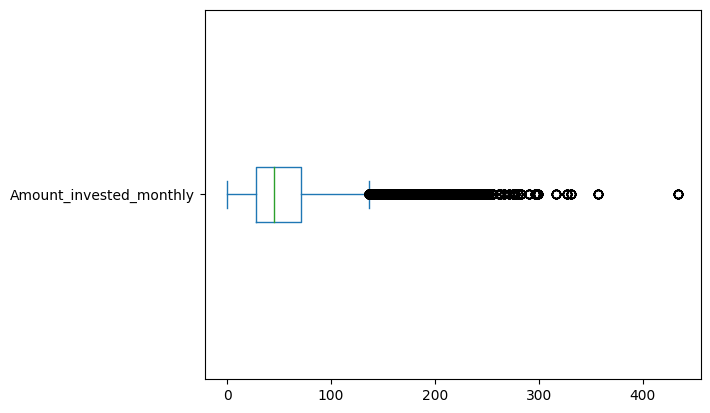

In [ ]:
df['Amount_invested_monthly'].plot(kind='box', vert=0)

In [ ]:
df.loc[df['Amount_invested_monthly']>=10000, 'Amount_invested_monthly'] = None

<Axes: >

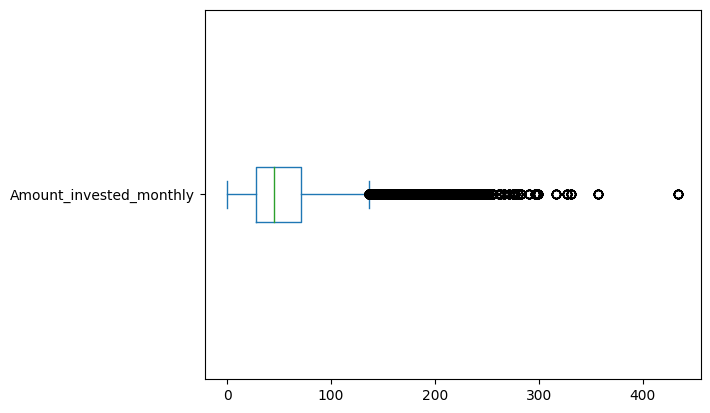

In [ ]:
df['Amount_invested_monthly'].plot(kind='box', vert=0)

In [ ]:
# fill group Mode
df['Amount_invested_monthly'] = df.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

In [ ]:
# train check
df[df['Credit_Score'].notna()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         100000 non-null  object 
 1   Customer_ID                100000 non-null  int64  
 2   Month                      100000 non-null  int64  
 3   Name                       100000 non-null  object 
 4   Age                        100000 non-null  int64  
 5   SSN                        100000 non-null  float64
 6   Occupation                 100000 non-null  object 
 7   Annual_Income              100000 non-null  float64
 8   Monthly_Inhand_Salary      100000 non-null  float64
 9   Num_Bank_Accounts          100000 non-null  float64
 10  Num_Credit_Card            100000 non-null  float64
 11  Interest_Rate              100000 non-null  float64
 12  Num_of_Loan                100000 non-null  int64  
 13  Type_of_Loan               100000 n

In [ ]:
# train save
df[df['Credit_Score'].notna()].to_csv("train.csv", index=False)

In [ ]:
# test check
df[df['Credit_Score'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 100000 to 149999
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         50000 non-null  object 
 1   Customer_ID                50000 non-null  int64  
 2   Month                      50000 non-null  int64  
 3   Name                       50000 non-null  object 
 4   Age                        50000 non-null  int64  
 5   SSN                        50000 non-null  float64
 6   Occupation                 50000 non-null  object 
 7   Annual_Income              50000 non-null  float64
 8   Monthly_Inhand_Salary      50000 non-null  float64
 9   Num_Bank_Accounts          50000 non-null  float64
 10  Num_Credit_Card            50000 non-null  float64
 11  Interest_Rate              50000 non-null  float64
 12  Num_of_Loan                50000 non-null  int64  
 13  Type_of_Loan               50000 non-null  ob

In [ ]:
# test save
df[df['Credit_Score'].isna()].drop(columns='Credit_Score').to_csv("test.csv", index=False)